# Generate a combined sine wave

In [63]:
import numpy as np

f1 = 5
f2 = 20
f3 = 10
res = 400
t = np.linspace(0, 1, res)

hz = np.sin(2*np.pi*f1*t)
hz2 = np.sin(2*np.pi*f2*t)
hz3 = np.sin(2*np.pi*f3*t)

new_hz = hz + hz2 + hz3

time_data = np.arange(0,len(hz))

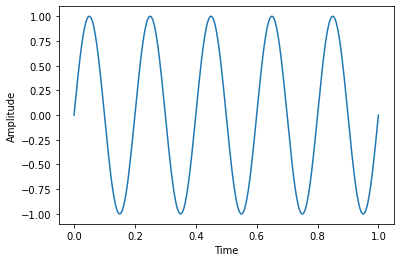

In [64]:
from matplotlib import pyplot as plt

plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.plot(t, hz)
plt.show()

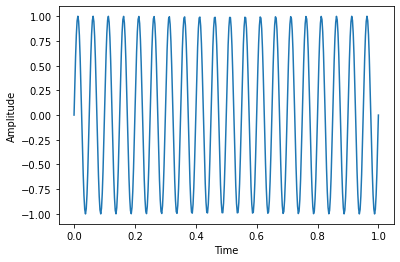

In [65]:
from matplotlib import pyplot as plt

plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.plot(t, hz2)
plt.show()

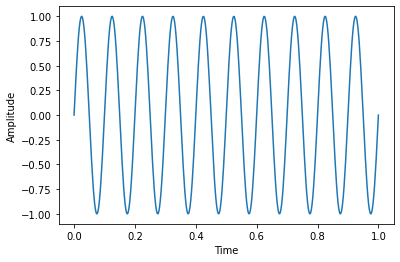

In [66]:
from matplotlib import pyplot as plt

plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.plot(t, hz3)
plt.show()

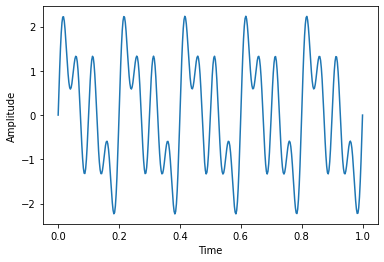

In [67]:
from matplotlib import pyplot as plt

plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.plot(t, new_hz)
plt.show()

# Filtering using FFT then IFFT


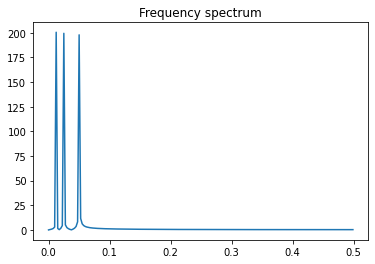

In [68]:
from matplotlib import pyplot as plt
import numpy as np

fft_new_hz = np.fft.fft(new_hz)
fft_new_hz = abs(fft_new_hz)

fft_new_hz = fft_new_hz[:len(fft_new_hz)//2]

plt.title('Frequency spectrum')
plt.plot(t[:len(t)//2], fft_new_hz)

/home/genomexyz/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


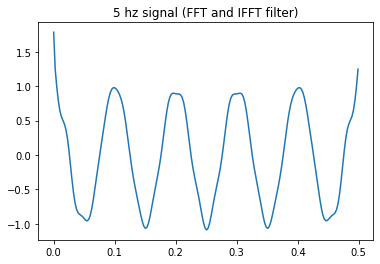

In [69]:
from matplotlib import pyplot as plt
import numpy as np

fft_new_hz = np.fft.fft(new_hz)
fft_new_hz = abs(fft_new_hz)

fft_new_hz = fft_new_hz[:len(fft_new_hz)//2]
fft_new_hz[f2] = 0
fft_new_hz[f3] = 0

mod_wave = np.fft.ifft(fft_new_hz)

plt.title('5 hz signal (FFT and IFFT filter)')
plt.plot(t[:len(t)//2], mod_wave)

[[ 7.59998243e-20  1.51999649e-19  7.59998243e-20  1.00000000e+00
  -8.95674708e-01  0.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.79522862e+00  8.06135954e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.80679557e+00  8.17773180e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.82583031e+00  8.36923578e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.85194026e+00  8.63192160e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.88452347e+00  8.95973336e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.92272283e+00  9.34404784e-01]
 [ 1.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
  -1.96537832e+00  9.77319436e-01]]


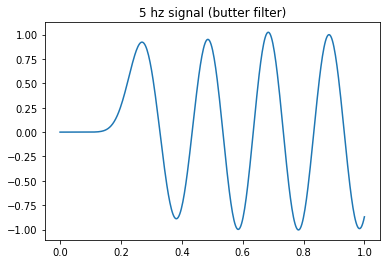

In [80]:
from scipy import signal

sos = signal.butter(15, 7, 'lp', fs=len(t), output='sos')
print(sos)

filtered = signal.sosfilt(sos, new_hz)

plt.title('5 hz signal (butter filter)')
plt.plot(t, filtered)

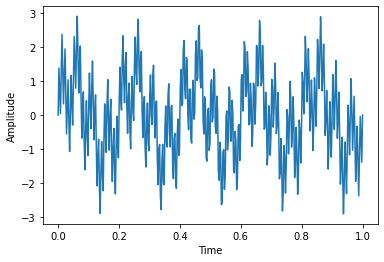

In [81]:
f4 = 100
hz4 = np.sin(2*np.pi*f4*t)
new_hz2 = hz + hz2 + hz4

plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.plot(t, new_hz2)
plt.show()

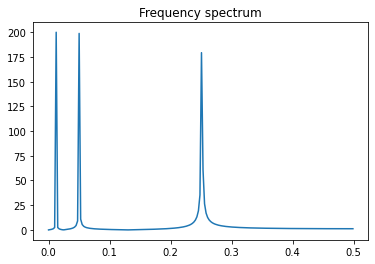

In [82]:
from matplotlib import pyplot as plt
import numpy as np

fft_new_hz = np.fft.fft(new_hz2)
fft_new_hz = abs(fft_new_hz)

fft_new_hz = fft_new_hz[:len(fft_new_hz)//2]

plt.title('Frequency spectrum')
plt.plot(t[:len(t)//2], fft_new_hz)

/home/genomexyz/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


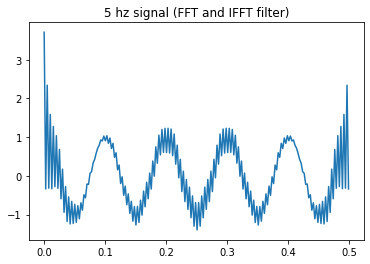

In [83]:

fft_new_hz[f2] = 0
fft_new_hz[f4] = 0

mod_wave = np.fft.ifft(fft_new_hz)

plt.title('5 hz signal (FFT and IFFT filter)')
plt.plot(t[:len(t)//2], mod_wave)

[[ 7.59998243e-20  1.51999649e-19  7.59998243e-20  1.00000000e+00
  -8.95674708e-01  0.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.79522862e+00  8.06135954e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.80679557e+00  8.17773180e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.82583031e+00  8.36923578e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.85194026e+00  8.63192160e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.88452347e+00  8.95973336e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.92272283e+00  9.34404784e-01]
 [ 1.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
  -1.96537832e+00  9.77319436e-01]]


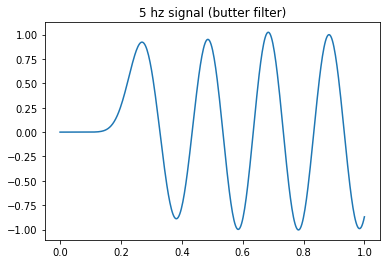

In [84]:
from scipy import signal

sos = signal.butter(15, 7, 'lp', fs=len(t), output='sos')
print(sos)

filtered = signal.sosfilt(sos, new_hz2)

plt.title('5 hz signal (butter filter)')
plt.plot(t, filtered)
#plt.plot(t[:len(t)//2], new_hz[:len(t)//2])

# Read monthly rain data

In [85]:
import numpy as np

file_rain = 'timeseries_tarakan'

rain_open = open(file_rain)
rain = rain_open.read()
rain = rain.split('\n')
rain_array = []
for i in range(len(rain)):
    rain_str = rain[i].strip()
    if rain_str == "":
        continue
    rain_array.append(float(rain_str))
rain_array = np.array(rain_array)
print(rain_array)

[434.8  117.9  262.7  435.8  256.4  355.3  388.9  522.   321.8  571.4
 396.3  332.9  198.2  128.4  311.1  395.2  341.2  156.5  520.6  422.4
 453.4  393.2  429.7  196.2  196.1  156.7  362.5  339.2  417.1  350.7
 247.6  345.2  122.9  203.7  510.3  375.5   48.7   95.1  186.5  183.7
 226.2  344.7  315.8  336.3  238.4  683.   455.7  117.1  215.   365.6
 369.4  460.2  471.6  287.1  391.   313.3  532.6  238.1  390.9  218.8
 484.8  191.9  431.3  287.1  409.6  327.3  200.4  279.4  327.3  308.2
 224.6  286.5  153.2  235.3  768.8  474.   483.4  343.1  313.7  313.4
 458.5  298.9  355.8  352.6  255.5  224.4  401.2  625.3  278.9  259.4
 207.7  351.5  392.   388.8  327.9  525.5  305.7  482.3  274.5  305.4
 377.9  224.9  362.1   42.2   38.3  250.   257.3  202.   353.5  142.3
 126.4   52.   256.5  354.2  341.   238.3  274.3  222.7  323.4  342.
 404.8  365.8  345.2  319.   283.6  420.2  387.6  381.3  281.3  356.3
 684.4  459.5  228.3  266.6  290.3  491.4  396.4  528.9  338.3  236.6
 178.1  393.6  558.4 

# Plot rain data


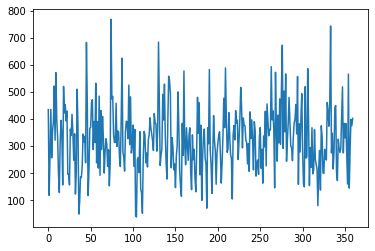

In [86]:
from matplotlib import pyplot as plt

time_data = np.arange(0,len(rain_array))
plt.plot(time_data, rain_array)

# Check it's frequency spectrum

[60  5 32 90 10] 360


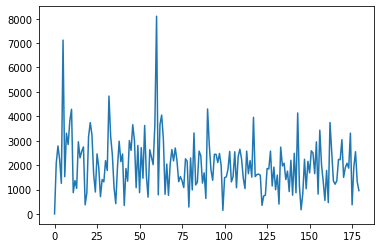

In [87]:
rain_fft = np.fft.fft(rain_array)
rain_fft = abs(rain_fft)
rain_fft[0] = 0
plt.plot(time_data[:len(time_data)//2], rain_fft[:len(time_data)//2])

freq_contoh_idx = np.argsort(rain_fft[:len(time_data)//2])[::-1]
print(freq_contoh_idx[:5], len(time_data))

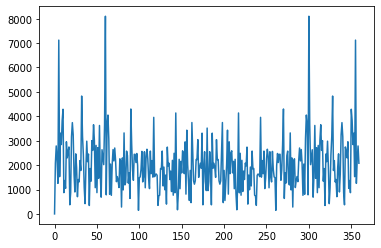

In [88]:
plt.plot(time_data, rain_fft)

In the plot above, the dominant cycle is a half annual cycle and a 6-year cycle. The third dominant cycle is the annual cycle (quite annual). This is interesting because it means the monsoon cycle is not the dominant one. This half annual cycle is called intraseasonal cycle of rainfall.

To see this interseasonal cycle, we must apply a band pass filter to the data.

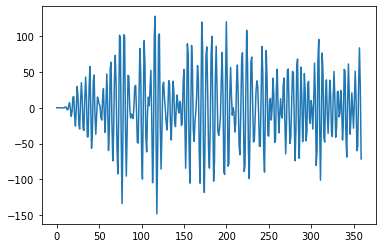

In [89]:
from scipy import signal

#to bandpass 4 - 6 month cycle
sos = signal.butter(10, [60,90], 'bp', fs=len(time_data), output='sos')
filtered = signal.sosfilt(sos, rain_array)

plt.plot(time_data, filtered)

# Filtering using FFT

/home/genomexyz/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


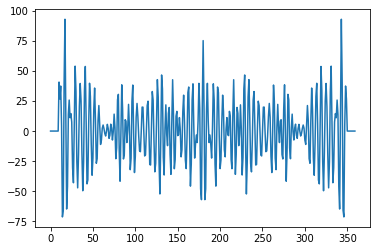

In [90]:
import numpy as np

rain_fft = np.fft.fft(rain_array)
rain_fft = abs(rain_fft)

rain_fft[:60] = 0
rain_fft[-60:] = 0

rain_fft[90:-90] = 0

filtered_wave = np.fft.ifft(rain_fft)
filtered_wave[:10] = 0
filtered_wave[-10:] = 0

#plt.title('5 hz signal (FFT and IFFT filter)')
plt.plot(time_data, filtered_wave)